In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# set env flags to catch BLAS used for scipy/numpy 
# to only use 1 cpu, n_cpus will be totally controlled by csky
os.environ['MKL_NUM_THREADS'] = "1"
os.environ['NUMEXPR_NUM_THREADS'] = "1"
os.environ['OMP_NUM_THREADS'] = "1"
os.environ['OPENBLAS_NUM_THREADS'] = "1"
os.environ['VECLIB_MAXIMUM_THREADS'] = "1"

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['savefig.facecolor'] = 'w'
from matplotlib import pyplot as plt
%matplotlib inline

import glob

# suppress natural naming warnings
import warnings
from tables import NaturalNameWarning
warnings.filterwarnings('ignore', category=NaturalNameWarning)

## Defines Settings

In [2]:
selection_version = 'version-001-p01'

plot_dir = '/home/mhuennefeld/public_html/analyses/DNNCascade/plots/egen_directfit_comparison/selection_{}'.format(selection_version)
df_dir = '/data/ana/PointSource/DNNCascade/analysis/{}/'.format(selection_version)


In [3]:
for dir_path in [plot_dir]:
    if not os.path.exists(dir_path):
        print('Creating directory:', dir_path)
        os.makedirs(dir_path)

## Load Data

In [4]:
print('Loading exp ...')
df_exp_list = []
for y in range(2011, 2021):
     df_exp_list.append(pd.read_hdf(
        '{}/IC86_{}_exp.hdf'.format(df_dir, y), key='df',
    ))
df_exp  = pd.concat(df_exp_list, ignore_index=True)
df_exp = df_exp.set_index(['I3EventHeader_Run', 'I3EventHeader_Event'], drop=False)


Loading exp ...


In [79]:
import csky as cy

repo = cy.selections.Repository()
specs = cy.selections.MESEDataSpecs.mesc_7yr

In [80]:
%%time

ana = cy.get_analysis(repo, 'version-001-p02', specs)

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [81]:
a = ana.anas[0]
a.bg_data

Events(1980 items | columns: azimuth, dec, energy, event, log10energy, mjd, ra, run, sigma, sindec, subevent)

In [98]:
df_exp_mesc = a.bg_data.as_dataframe
df_exp_mesc['zenith'] = df_exp_mesc['dec'] + np.pi/2. # Note: this is not quite exact!
df_exp_mesc['I3EventHeader_Run'] = df_exp_mesc['run']
df_exp_mesc['I3EventHeader_Event'] = df_exp_mesc['event']
df_exp_mesc = df_exp_mesc.set_index(['I3EventHeader_Run', 'I3EventHeader_Event'], drop=False)
df_exp_mesc

azimuth       dec    sindec  \
I3EventHeader_Run I3EventHeader_Event                                 
115975            40600729             3.310363  1.263701  0.953216   
115994            2538090              1.492745  0.236737  0.234532   
                  29874216             3.602833 -0.010473 -0.010472   
115995            36172422             5.024653  0.849182  0.750740   
116024            45544264             5.620123 -0.028565 -0.028561   
...                                         ...       ...       ...   
129497            30635325             3.441858 -1.394667 -0.984529   
                  33733832             1.373300  0.352983  0.345698   
129498            71692545             1.568269 -0.031419 -0.031414   
129500            12101878             4.569687  0.767704  0.694485   
129510            63482845             1.873998 -1.049390 -0.867120   

                                              energy  log10energy     event  \
I3EventHeader_Run I3EventHeader_Event                                         
115975            40600729              11994.861328     4.078995  40600729   
115994            2538090               70022.054688     4.845235   2538090   
                  29874216             166558.453125     5.221567  29874216   
115995            36172422               1966.362183     3.293664  36172422   
116024            45544264              51636.796875     4.712959  45544264   
...                                              ...          ...       ...   
129497            30635325             214765.718750     5.331965  30635325   
                  33733832               1605.827759     3.205699  33733832   
129498            71692545                790.580566     2.897946  71692545   
129500            12101878               1407.813232     3.148545  12101878   
129510            63482845              57437.976562     4.759199  63482845   

                                                mjd        ra     run  \
I3EventHeader_Run I3EventHeader_Event                                   
115975            40600729             55347.509998  5.806866  115975   
115994            2538090              55351.322214  0.226998  115994   
                  29874216             55351.465966  5.305788  115994   
115995            36172422             55351.834496  6.205850  115995   
116024            45544264             55354.823179  5.590685  116024   
...                                             ...       ...     ...   
129497            30635325             57884.213293  3.467206  129497   
                  33733832             57884.226865  5.621270  129497   
129498            71692545             57884.727392  2.296632  129498   
129500            12101878             57885.132929  1.850250  129500   
129510            63482845             57888.696142  1.862824  129510   

                                          sigma  subevent    zenith  \
I3EventHeader_Run I3EventHeader_Event                                 
115975            40600729             0.181260       1.0  2.834497   
115994            2538090              0.157607       1.0  1.807534   
                  29874216             0.161367       1.0  1.560324   
115995            36172422             0.873051       1.0  2.419978   
116024            45544264             0.086546       1.0  1.542232   
...                                         ...       ...       ...   
129497            30635325             0.095539       1.0  0.176129   
                  33733832             1.574404       1.0  1.923779   
129498            71692545             1.061956       1.0  1.539377   
129500            12101878             0.836218       1.0  2.338500   
129510            63482845             0.106427       1.0  0.521406   

                                       I3EventHeader_Run  I3EventHeader_Event  
I3EventHeader_Run I3EventHeader_Event                                          
115975            40600729                        1159

## Select HESE Events

In [5]:
hese_events = """127225.4732666
124256.6592218
124625.77850022
125365.30022811
126099.12931336
129541.4261345
129866.5123331
115994.29874216
128619.66564632
118549.11722208
126865.46801086
125335.34854587
128027.64761685
129497.30635325
116698.10198436
129112.14865593
126283.47286594
119352.56498321
119316.36556705
119404.80750561
124927.17485033
125979.54250116
118381.19162840
129402.8407152
124098.27598000
119842.82622124
123326.18647949
124333.60375689
118545.63733662
120398.25772043
119214.8606380
129997.40790411
121679.36086773
120638.2924273
127339.64954567
130111.70719303
118607.40435683
120867.9198123
118283.9445773
115994.2538090
130219.10092093
128224.10435404
119595.30769232
128809.57127218
130241.31728846
124852.18750800
128239.72790735
120421.44633110
125975.22186251
119470.48424887
118435.58198553
129316.30230768
128747.42700916
124244.7608824
125914.75630389
129510.63482845
129678.27285925
122649.63903532
124571.17513088
128782.62371492
126320.6425207
119674.8449256
118145.5142726
117371.31623515
128695.52259779
124648.7756176
126090.33142246
128973.69101495
123217.66529770
121240.72944671
118178.66452255
126406.63228689
124455.8202640
119474.33152537
130171.34032434"""

hese_events = hese_events.split('\n')
hese_runs = [int(h.split('.')[0]) for h in hese_events]
hese_event = [int(h.split('.')[1]) for h in hese_events]
hese_idx = ([(int(h.split('.')[0]), int(h.split('.')[1])) for h in hese_events])


In [170]:
df_sel = df_exp.loc[df_exp.index.intersection(hese_idx)]
df_sel_mesc = df_exp_mesc.loc[df_exp_mesc.index.intersection(df_sel.index)]

idx_overlap = df_exp_mesc.index.intersection(df_exp.index)
df_mesc_overlap = df_exp_mesc.loc[idx_overlap]
df_exp_overlap = df_exp.loc[idx_overlap]

len(df_sel), len(df_sel_mesc), len(df_mesc_overlap), len(df_exp_overlap)

(61, 52, 1365, 1365)

In [171]:
key_trafo = {
    'zen': 'egen_zen',
    'azi': 'egen_az',
    'angErr': 'egen_ang_esterr',
    'I3EventHeader_Run': 'run',
    'I3EventHeader_Event': 'event',
}
key_trafo_inv = {v:k for k, v in key_trafo.items()}

key_trafo_mesc = {
    'zenith': 'mesc7yr_zen',
    'azimuth': 'mesc7yr_az',
    'sigma': 'mesc7yr_ang_esterr',
    'I3EventHeader_Run': 'run',
    'I3EventHeader_Event': 'event',
}
key_trafo_mesc_inv = {v:k for k, v in key_trafo_mesc.items()}


#### Define Method to obtain 50% contaiment contour

In [123]:
from dnn_cascade_selection.utils.notebook import ps_pdf
from scipy.stats import vonmises
from scipy.optimize import minimize


def von_mises_in_dPsi_ppf(q, sigma, x0=0.5):
    """PPF in dPsi (minimized via scipy.optimize.minimize)
    """
    norm = ps_pdf.von_mises_in_dPsi_cdf(np.deg2rad(180), sigma=sigma)
    
    def loss(x):
        if np.any(x < 0):
            return np.inf
            
        return np.sum((ps_pdf.von_mises_in_dPsi_cdf(x, sigma=sigma)/norm - q)**2)
    
    result = minimize(loss, x0=np.zeros_like(q) + x0)
    return result.x

def von_mises_in_dPsi_ppf_grid(
            q, sigma, 
            grid=np.deg2rad(np.r_[0:40:1, 40:80:2, 80:100:4, 100:181:8]),
            with_fit=True,
        ):
    """PPF in dPsi (minimized on grid plus optional scipy minimizer)
    """
    q = np.atleast_1d(q)
    sigma = np.atleast_1d(sigma)
    norm = ps_pdf.von_mises_in_dPsi_cdf(np.deg2rad(180), sigma=sigma)
    
    assert len(q) == len(sigma)
    def loss(x, sigma, q):
        v = ps_pdf.von_mises_in_dPsi_cdf(x, sigma=sigma)
        return (ps_pdf.von_mises_in_dPsi_cdf(x, sigma=sigma)/norm - q)**2
    
    x_vals = np.empty_like(q)
    
    for i, (q_i, sigma_i) in tqdm(enumerate(zip(q, sigma)), total=len(sigma)):
        sigma_i_exp = np.ones_like(grid) * sigma_i
        q_i_exp = np.ones_like(grid) * q_i
        losses = loss(x=grid, sigma=sigma_i_exp, q=q_i_exp)
        
        min_index = np.argmin(losses)
        min_x = grid[min_index]
        
        if with_fit:
            min_x = von_mises_in_dPsi_ppf(q_i, sigma_i, x0=min_x)
        x_vals[i] = min_x
    
    return x_vals

def get_von_mises_50p_containment(sigma):
    return von_mises_in_dPsi_ppf_grid(
        q=np.ones_like(sigma) * 0.5,
        sigma=sigma,
    )

def get_von_mises_90p_containment(sigma):
    return von_mises_in_dPsi_ppf_grid(
        q=np.ones_like(sigma) * 0.9,
        sigma=sigma,
    )

sigma = np.deg2rad(np.linspace(1, 40, 10))
q = np.linspace(0, 1, 10)

print(q, ps_pdf.von_mises_in_dPsi_cdf(von_mises_in_dPsi_ppf_grid(q, sigma=sigma), sigma=sigma))
print(q, ps_pdf.von_mises_in_dPsi_cdf(von_mises_in_dPsi_ppf(q, sigma=sigma), sigma=sigma))
                                      

  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0.         0.11079075 0.2222222  0.33333332 0.44444484 0.55555506
 0.66666677 0.77777758 0.88888865 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] [0.99989847 0.99711625 0.88666984 0.01003913 0.17684176 0.56359086
 0.70391389 0.71406721 0.67680558 0.62361466]


#### Save Data

In [124]:
df_exp_mesc.loc[(115975, 40600729)]
(115975, 40600729) in df_exp_mesc.index

True

In [150]:
import pickle
from copy import deepcopy

# add DNNCascade data
data = {}
for k, k_dest in key_trafo.items():
    data[k_dest] = df_sel[k].values

mesc_data = {k_dest: [] for k, k_dest in key_trafo_mesc.items()}
    
# add MESC7yr data
for run, event in zip(data['run'], data['event']):
    idx = (run, event)
    if idx in df_exp_mesc.index:
        for k, k_dest in key_trafo_mesc.items():
            mesc_data[k_dest].append(df_exp_mesc.loc[idx][k])
    else:
        print('Index not in MESC 7yr:', idx)
        for k, k_dest in key_trafo_mesc.items():
            if k_dest == 'run':
                mesc_data[k_dest].append(run)
            elif k_dest == 'event':
                mesc_data[k_dest].append(event)
            else:
                mesc_data[k_dest].append(np.nan)
                
# sanity check     
assert np.allclose(data['run'], mesc_data['run']), (data['run'], mesc_data['run'])
assert np.allclose(data['event'], mesc_data['event']), (data['event'], mesc_data['event'])

for k, k_dest in key_trafo_mesc.items():
    if k_dest not in ['run', 'event']:
        data[k_dest] = mesc_data[k_dest]

# compute 50% and 90% contours
for ang_err_key in ['egen_ang_esterr', 'mesc7yr_ang_esterr']:
    print('Calculating contours for: {}'.format(ang_err_key))
    data[ang_err_key + '_50percent'] = get_von_mises_50p_containment(data[ang_err_key])
    data[ang_err_key + '_90percent'] = get_von_mises_90p_containment(data[ang_err_key])

for k, vals in data.items():
    data[k] = np.array(vals)

with open(os.path.join(plot_dir, 'hese_cascades.pkl'), 'wb') as f:
        pickle.dump(data, f, protocol=2)

Index not in MESC 7yr: (120398, 25772043)
Index not in MESC 7yr: (127339, 64954567)
Index not in MESC 7yr: (129316, 30230768)
Index not in MESC 7yr: (129541, 4261345)
Index not in MESC 7yr: (129678, 27285925)
Index not in MESC 7yr: (129866, 5123331)
Index not in MESC 7yr: (129997, 40790411)
Index not in MESC 7yr: (130171, 34032434)
Index not in MESC 7yr: (130241, 31728846)
Calculating contours for: egen_ang_esterr


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Calculating contours for: mesc7yr_ang_esterr


  0%|          | 0/61 [00:00<?, ?it/s]

/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selectio

  0%|          | 0/61 [00:00<?, ?it/s]

/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selection/utils/notebook/ps_pdf.py:124: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  von_mises_in_dPsi_pdf, a=0, b=x_i, args=(sigma_i,))
/mnt/lfs7/user/mhuennefeld/software/repositories/dnn_cascade_selection/dnn_cascade_selectio

In [169]:
for k in list(data.keys()):
    print(k)


egen_zen
egen_az
egen_ang_esterr
run
event
mesc7yr_zen
mesc7yr_az
mesc7yr_ang_esterr
egen_ang_esterr_50percent
egen_ang_esterr_90percent
mesc7yr_ang_esterr_50percent
mesc7yr_ang_esterr_90percent


## HESE Overlap Plots

/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


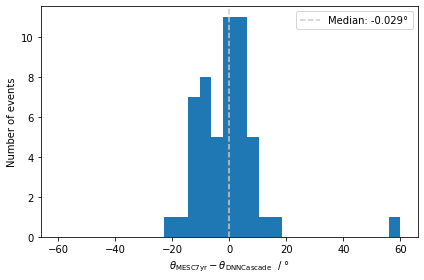

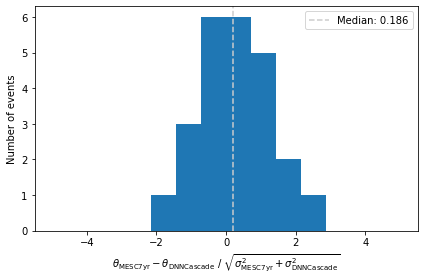

In [231]:
residuals = data['mesc7yr_zen'] - data['egen_zen']
sigma = np.sqrt(data['mesc7yr_ang_esterr']**2 - data['egen_ang_esterr']**2)

bins = np.linspace(-60, 60, 30)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(residuals), bins=bins)
median = np.nanmedian(np.rad2deg(residuals))
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}°'.format(median))
ax.legend()
ax.set_xlabel(r'$\theta_\mathrm{MESC7yr} - \theta_\mathrm{DNNCascade}$  / °')
ax.set_ylabel('Number of events')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_zenith.png'))

bins = np.linspace(-5, 5, 15)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(residuals/sigma, bins=bins)
median = np.nanmedian(residuals/sigma)
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}'.format(median))
ax.legend()
ax.set_xlabel(r'$\theta_\mathrm{MESC7yr} - \theta_\mathrm{DNNCascade}$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_zenith_relative.png'))

/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


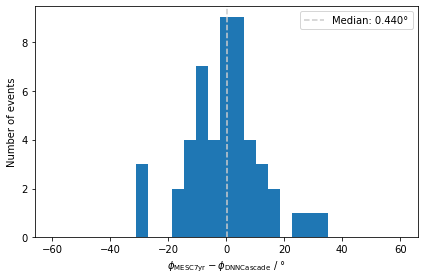

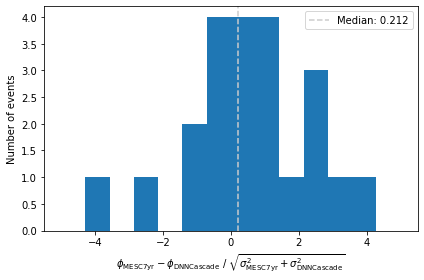

In [212]:
sigma = np.sqrt(data['mesc7yr_ang_esterr']**2 - data['egen_ang_esterr']**2)
residuals = data['mesc7yr_az'] - data['egen_az']

bins = np.linspace(-60, 60, 30)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(residuals), bins=bins)
median = np.nanmedian(np.rad2deg(residuals))
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}°'.format(median))
ax.legend()
ax.set_xlabel(r'$\phi_\mathrm{MESC7yr} - \phi_\mathrm{DNNCascade}$ / °')
ax.set_ylabel('Number of events')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_azimuth.png'))

bins = np.linspace(-5, 5, 15)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(residuals/sigma, bins=bins)
median = np.nanmedian(residuals/sigma)
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}'.format(median))
ax.legend()
ax.set_xlabel(r'$\phi_\mathrm{MESC7yr} - \phi_\mathrm{DNNCascade}$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_azimuth_relative.png'))


/home/mhuennefeld/software/virtualenvs/tensorflow2.3_py3-v4.1.0_csky/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


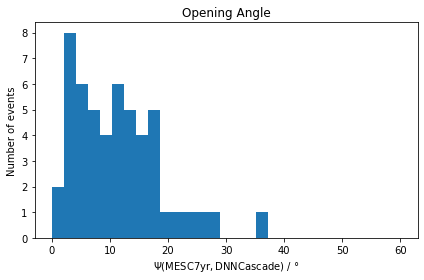

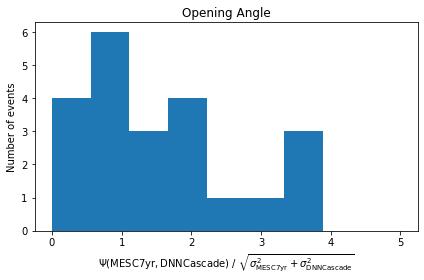

In [213]:
from dnn_cascade_selection.utils.notebook import coordinates as coord

sigma = np.sqrt(data['mesc7yr_ang_esterr']**2 - data['egen_ang_esterr']**2)
opening_angle = coord.get_angle_deviation(
    azimuth1=data['mesc7yr_az'],
    zenith1=data['mesc7yr_zen'],
    azimuth2=data['egen_az'],
    zenith2=data['egen_zen'],
)


bins = np.linspace(0, 60, 30)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(opening_angle), bins=bins)
ax.set_xlabel(r'$\Psi(\mathrm{MESC7yr, DNNCascade})$ / °')
ax.set_ylabel('Number of events')
ax.set_title('Opening Angle')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_angle.png'))

bins = np.linspace(0, 5, 10)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(opening_angle/sigma, bins=bins)
ax.set_xlabel(r'$\Psi(\mathrm{MESC7yr, DNNCascade})$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
ax.set_title('Opening Angle')
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_angle_relative.png'))

## MESC 7yr and DNNCascade Overlap Plots

In [225]:
num_overlap = len(df_mesc_overlap)
fr_overlap = len(df_mesc_overlap) * 100. / len(df_exp_mesc)

overlap_str = 'MESC 7yr events in DNNCascade: {} events | {:3.2f}%'.format(num_overlap, fr_overlap)
print(overlap_str)
print(len(df_exp_mesc), len(df_sel))


MESC 7yr events in DNNCascade: 1365 events | 68.94%
1980 61


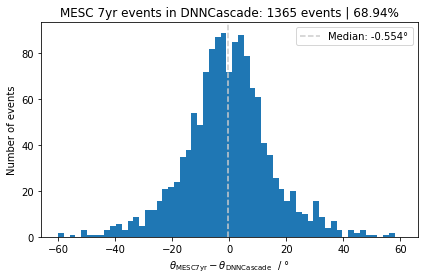

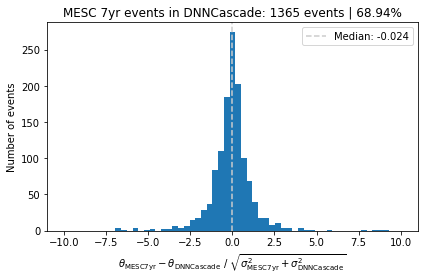

In [223]:
residuals = df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_zen']] - df_exp_overlap[key_trafo_inv['egen_zen']]
sigma = np.sqrt(
    df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_ang_esterr']]**2 
    - df_exp_overlap[key_trafo_inv['egen_ang_esterr']]**2
)

bins = np.linspace(-60, 60, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(residuals), bins=bins)
median = np.nanmedian(np.rad2deg(residuals))
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}°'.format(median))
ax.legend()
ax.set_xlabel(r'$\theta_\mathrm{MESC7yr} - \theta_\mathrm{DNNCascade}$  / °')
ax.set_ylabel('Number of events')
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_zenith_overlap.png'))

bins = np.linspace(-10, 10, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(residuals/sigma, bins=bins)
median = np.nanmedian(residuals/sigma)
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}'.format(median))
ax.legend()
ax.set_xlabel(r'$\theta_\mathrm{MESC7yr} - \theta_\mathrm{DNNCascade}$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_zenith_relative_overlap.png'))

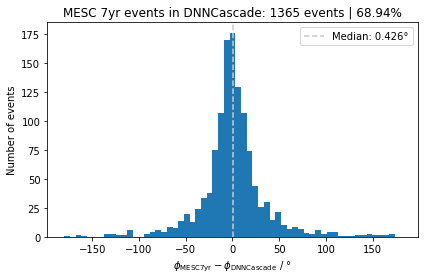

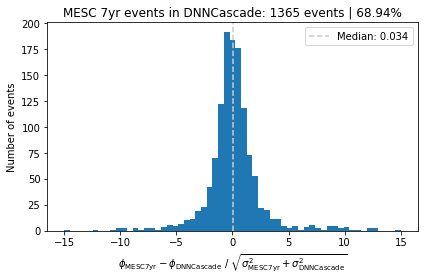

In [221]:
residuals = df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_az']] - df_exp_overlap[key_trafo_inv['egen_az']]
sigma = np.sqrt(
    df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_ang_esterr']]**2 
    - df_exp_overlap[key_trafo_inv['egen_ang_esterr']]**2
)

bins = np.linspace(-180, 180, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(residuals), bins=bins)
ax.set_xlabel(r'$\phi_\mathrm{MESC7yr} - \phi_\mathrm{DNNCascade}$ / °')
ax.set_ylabel('Number of events')
median = np.nanmedian(np.rad2deg(residuals))
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}°'.format(median))
ax.legend()
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_azimuth_overlap.png'))

bins = np.linspace(-15, 15, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(residuals/sigma, bins=bins)
median = np.nanmedian(residuals/sigma)
ax.axvline(median, color='0.8', ls='--', label='Median: {:3.3f}'.format(median))
ax.legend()
ax.set_xlabel(r'$\phi_\mathrm{MESC7yr} - \phi_\mathrm{DNNCascade}$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_azimuth_relative_overlap.png'))


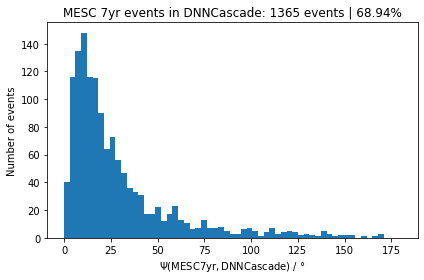

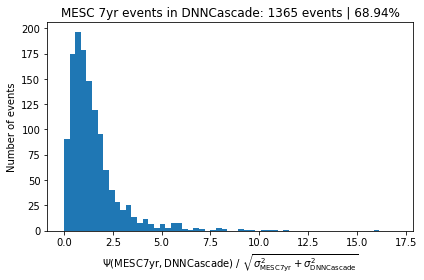

In [220]:
from dnn_cascade_selection.utils.notebook import coordinates as coord

sigma = np.sqrt(
    df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_ang_esterr']]**2 
    - df_exp_overlap[key_trafo_inv['egen_ang_esterr']]**2
)

opening_angle = coord.get_angle_deviation(
    azimuth1=df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_az']],
    zenith1=df_mesc_overlap[key_trafo_mesc_inv['mesc7yr_zen']],
    azimuth2=df_exp_overlap[key_trafo_inv['egen_az']],
    zenith2=df_exp_overlap[key_trafo_inv['egen_zen']],
)


bins = np.linspace(0, 180, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(np.rad2deg(opening_angle), bins=bins)
ax.set_xlabel(r'$\Psi(\mathrm{MESC7yr, DNNCascade})$ / °')
ax.set_ylabel('Number of events')
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_angle_overlap.png'))

bins = np.linspace(0, 17, 60)
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(opening_angle/sigma, bins=bins)
ax.set_xlabel(r'$\Psi(\mathrm{MESC7yr, DNNCascade})$ / $\sqrt{\sigma_\mathrm{MESC7yr}^2 + \sigma_\mathrm{DNNCascade}^2}$')
ax.set_ylabel('Number of events')
ax.set_title(overlap_str)
fig.tight_layout()
fig.savefig(os.path.join(plot_dir, 'residuals_angle_relative_overlap.png'))